In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline


Used in Azimuthal mass ejecta paper, using Sean's bin measurements data from April 2024

needs 'sean2.csv'

stores data in 'ejectamass_bins.npz'

Makes figures: 
*   'aves2.png' showing azimuthal mass distribution
*   'mej2.png'  showing total ejecta mass as a function of impact angle

In [32]:
zeta_bins = np.linspace(0,360,9)  # 9 bins, in degrees, azimuthal angle 
zeta_bins = zeta_bins[0:-1]   # truncate to 8 bins
print(zeta_bins)  # these are mid bin now for this data set 
zeta_bin_left = zeta_bins - 45./2  # in case we want left and right limits
zeta_bin_right = zeta_bins + 45./2

[  0.  45.  90. 135. 180. 225. 270. 315.]


In [33]:
# read in Sean's new data (April 2024), 6 trials  for each of 6 impact angles right now
data = np.loadtxt('sean2.csv',comments='#',delimiter=',')
#data[i,j] # j is row, i is col
trials = data[:,1]
theta_I_deg = data[:,0]
bins = data[:,2:2+8]  # this is the mass in each bin in grams

# list of impact angles in this data set, add to this list if there is more data later!
theta_list_deg = np.array([80.0,70,60,50,40,30,20])

In [34]:
print(theta_I_deg)  # check out the table to make sure it looks good 
print(trials)

[80. 80. 80. 80. 80. 80. 70. 70. 70. 70. 70. 70. 60. 60. 60. 60. 60. 60.
 50. 50. 50. 50. 50. 50. 40. 40. 40. 40. 40. 40. 30. 30. 30. 30. 30. 30.
 20. 20. 20. 20. 20. 20.]
[1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 6.
 1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 6.]


In [35]:
bins #  
# zeta=0 is not first entry, uprange is in the middle 

array([[1.53, 0.95, 0.57, 0.41, 0.31, 0.45, 0.85, 1.44],
       [1.87, 1.15, 0.61, 0.48, 0.39, 0.52, 0.82, 1.94],
       [1.5 , 0.92, 0.77, 0.47, 0.48, 0.84, 1.06, 1.64],
       [0.81, 0.84, 0.71, 0.63, 0.63, 1.29, 1.75, 1.33],
       [1.54, 1.27, 1.33, 0.51, 0.34, 0.37, 0.67, 0.92],
       [1.13, 0.78, 0.68, 0.59, 0.4 , 0.45, 1.08, 1.1 ],
       [1.79, 1.74, 1.17, 0.46, 0.27, 0.26, 0.71, 1.38],
       [1.42, 1.19, 0.66, 0.55, 0.27, 0.67, 0.87, 1.24],
       [1.38, 1.5 , 1.03, 0.42, 0.32, 0.43, 0.87, 1.28],
       [1.95, 1.83, 0.76, 0.26, 0.2 , 0.19, 0.51, 1.25],
       [1.67, 1.92, 1.4 , 0.51, 0.36, 0.41, 0.53, 1.06],
       [2.1 , 1.5 , 0.55, 0.22, 0.18, 0.14, 0.41, 1.52],
       [2.25, 1.71, 0.77, 0.32, 0.15, 0.36, 0.69, 1.49],
       [2.06, 1.35, 0.51, 0.2 , 0.23, 0.37, 0.76, 1.67],
       [1.77, 1.55, 0.8 , 0.19, 0.14, 0.19, 0.63, 1.25],
       [2.06, 1.96, 0.4 , 0.11, 0.07, 0.21, 0.4 , 1.41],
       [0.98, 0.73, 0.57, 0.89, 0.64, 0.79, 0.74, 0.69],
       [0.87, 0.82, 1.  , 0.84,

In [36]:
# let's discuss errors caused by alignment of trays with crater center rather than impact site.

def perrors(d_ai):  # d_ai is distance between crater center and impact site in cm
    r_edge = 4.0 # distance from crater center to tray edge, cm
    zeta_225 = 22.5*np.pi/180  # angle w.r.t crater center, this is dzeta/2 also
    h = np.sin(zeta_225)*r_edge  # y value of top of tray inner circle edge
    r_down = r_edge + d_ai 
    zeta_down = np.arcsin(h/r_down)
    r_up = r_edge - d_ai 
    zeta_up = np.arcsin(h/r_up)

    print('zeta angles {:.2f} {:.2f} (deg)'.format( zeta_down*180/np.pi,zeta_up*180/np.pi))
    print('dzetafracs {:.2f} {:.2f}'.format(zeta_down/zeta_225, zeta_up/zeta_225))
    # this is a really really big error!
    
perrors(1.49)
perrors(1.1)  #discussed in paper

zeta angles 16.19 37.58 (deg)
dzetafracs 0.72 1.67
zeta angles 17.47 31.86 (deg)
dzetafracs 0.78 1.42


In [37]:
# compute averages and standard deviations for each impact angle theta_I set of trials
# arguments:
#    bins: is data, one row per data trial
#    theta_I_deg, array of impact angles in degrees for each data trial
#    theta_list_deg, a short list of impact angles for the experiments
#    zeta_bins, a list of azimuthal values in degreess for the bin centers
# returns:
#   aves_arr  2d array of averages (means) 2d array i,j i is impact angle j is zeta bin 
#         (there are 8 of the zeta bins) in grams
#   sigs_arr, 2d array of sigmas (stds) same format as aves_arr
#   m_arr, 1d array of summed masses one for each experiment in grams 
#   mass_mean_arr, 1d array total mean mass, at each impact angle 
#   mass_sig_arr, 1d array std of mass, at each impact angle
#   bins_shift, data in bins, shifted so starts with zeta=0 bin, now in order of increasing zeta 
#   theta_mesh, impact angle values in radians consistent with these 2d arrays
#   zeta_mesh, azimuthal angle values in radians consistent with these 2d arrays
def mkaves(bins,theta_I_deg,theta_list_deg,zeta_bins):
    nzeta = len(zeta_bins)  # number of zetabins
    nn = len(theta_I_deg)  # total numbers of experiments
    nang = len(theta_list_deg)   # numbers of impact angles 
    aves_arr = np.zeros((nang,nzeta))  # averages impact angle, zeta bin
    sigs_arr = np.zeros((nang,nzeta))  # standard deviations each impact angle
    theta_mesh = np.zeros((nang,nzeta))   # in radians, impact angle 
    zeta_mesh  = np.zeros((nang,nzeta))   # az angle in radians
    m_arr = np.zeros(nn)  # total masses each exp.
    mass_mean_arr = np.zeros(nang)  # mean total mass 
    mass_sig_arr = np.zeros(nang)  # standard deviation total mass 
    theta_short = np.zeros(nang)
    bins_shift = np.copy(bins)
    bins_shift = np.roll(bins_shift,(0,4))  # rotate order of zetas!
    for i in range(nn):
        m_arr[i] = np.sum(bins_shift[i,:]) # total mass each experiment trial
        
    # make averages and standard deviations of masses 
    # as a function of zeta (az angle) and theta_I (impact angle)
    for i in range(nang):  # loop over impact angles 
        jj = (theta_I_deg == theta_list_deg[i])
        #print(jj)
        for m in range(nzeta):  #loop over azimuthal angle
            mu = np.mean(bins_shift[jj,m])
            sig = np.std(bins_shift[jj,m])
            aves_arr[i,m]= mu   # averages 
            sigs_arr[i,m]= sig  # standard deviations  
            theta_mesh[i,m] = theta_list_deg[i]*np.pi/180.0
            zeta_mesh[i,m] = zeta_bins[m]*np.pi/180.0
    
    # compute averages and standard deviations for integrated mass 
    for i in range(nang):
        jj = (theta_I_deg == theta_list_deg[i])
        mu = np.mean(m_arr[jj])
        sig = np.std(m_arr[jj])
        mass_mean_arr[i] = mu  # averages 
        mass_sig_arr[i] = sig  # standard deviations 
        
    return aves_arr,sigs_arr,m_arr,mass_mean_arr,mass_sig_arr,bins_shift,theta_mesh,zeta_mesh

# do the averaging
aves_arr,sigs_arr,m_arr,mass_mean_arr,mass_sig_arr,bins_shift,theta_mesh,zeta_mesh = \
    mkaves(bins,theta_I_deg,theta_list_deg,zeta_bins)

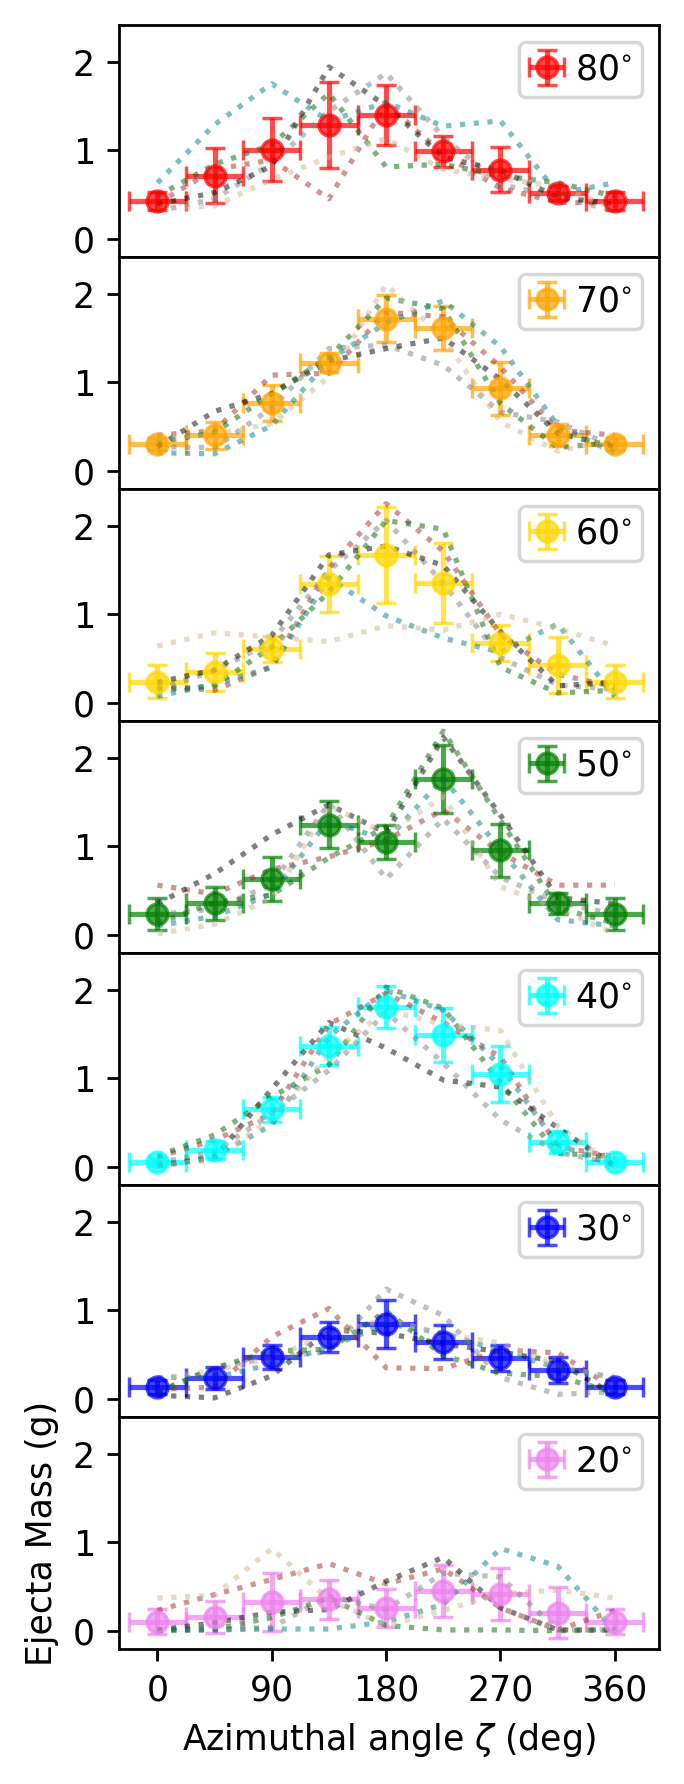

In [38]:
# plot ejecta mass per azimuthal bin at each impact angle 
colorlist = ['red','orange','gold','green','cyan','blue','violet']
colorlist2 = ['brown','grey','black','darkgreen','teal','tan']

# set up figure 
fig,axarr = plt.subplots(7,1,figsize=(3,7.3),dpi=250,sharex=True,sharey=True)
plt.subplots_adjust(wspace=0,hspace=0,left=0.18,bottom=0.1,top=0.99)

nn = len(theta_I_deg)  # total number of trials 
nang = len(theta_list_deg)  # number of impact angles

zeta_bins_extend = np.append(zeta_bins,360.)  # for plotting first and last both
xerr = zeta_bins_extend*0 + 45./2.  # horizontal error bars

# loop over every impact angle 
for i in range(nang):
    means = np.squeeze(aves_arr[i,:])  # mean masses 
    sigs  = np.squeeze(sigs_arr[i,:])  # standard deviations 
    means_extend = np.append(means,means[0])  # add first point on at the end of the array 
    sigs_extend  = np.append(sigs,sigs[0])
    deg_string = r'{:.0f}$\!^\circ$'.format(theta_list_deg[i])  #legend label
    axarr[i].errorbar(zeta_bins_extend,means_extend,xerr=xerr,yerr = sigs_extend,\
                color=colorlist[i],label=deg_string,capsize=3,fmt='o',alpha=0.7)
    axarr[i].legend(handletextpad=0.3,loc='upper right',borderpad=0.3,handlelength=1.0)
    
    
    jj = np.squeeze(np.argwhere(theta_I_deg == theta_list_deg[i])) # get arguments where this is true
    for k in range(len(jj)):  # plot each trial separately as a dotted line
        tindex = jj[k]
        pts = bins_shift[tindex,:]
        pts_extend = np.append(pts,pts[0])
        axarr[i].plot(zeta_bins_extend,pts_extend,':',ms=1,color=colorlist2[k],alpha=0.5)
        
axarr[6].set_xlim([-30,360+35])
axarr[6].set_ylabel('Ejecta Mass (g)')
axarr[6].set_xlabel(r'Azimuthal angle $\zeta$ (deg)')
axarr[6].set_xticks([0,90,180,270,360],labels=[0,90,180,270,360])

plt.savefig('aves2.png',dpi=200)

In [39]:
# we store the data!  #this makes an npz file that can be read in to other notebooks easily
ofile = "ejectamass_bins"
np.savez(ofile, aves_arr=aves_arr, sigs_arr=sigs_arr,\
         theta_mesh=theta_mesh,zeta_mesh=zeta_mesh,\
         mass_mean_arr=mass_mean_arr,mass_sig_arr=mass_sig_arr)


In [40]:
print(theta_list_deg)

[80. 70. 60. 50. 40. 30. 20.]


In [41]:
#Crater volume measurements from Suo+24
vol_CR = np.array([13.84, 13.3, 14.6, 15.3, 13.2, 8.5, 7.0, 3.3])  #cm^3 crater volume
# all of these from previous paper Suo+24 except the 80 degree measurement which we updated
#vol_CR = np.flip(vol)  # going from 10 degres to 80
print(vol_CR)
theta_vol = np.array([80.,70,60,50,40,30,20,10])

[13.84 13.3  14.6  15.3  13.2   8.5   7.    3.3 ]


IMPORTANT
ratio of ejecta mass to crater mass 0.35


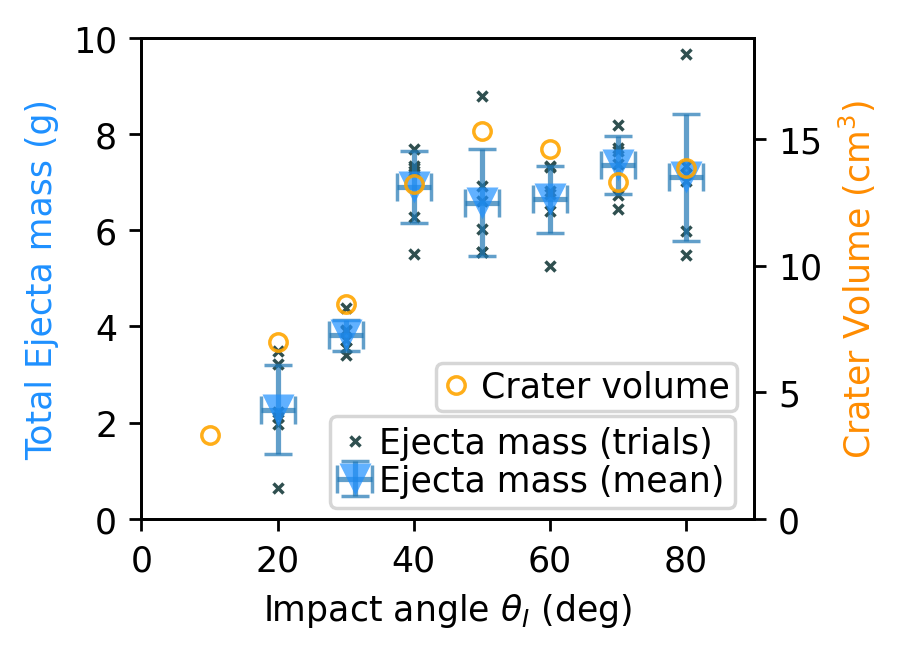

In [42]:
# plot crater volume and ejecta mass

fig,ax = plt.subplots(1,1,figsize=(3.5,2.5),dpi=250,facecolor='white')
plt.subplots_adjust(right=0.85,left=0.15,top=0.97,bottom=0.2)

ax.set_xlabel(r'Impact angle $\theta_I$ (deg)')
ax.set_ylabel('Total Ejecta mass (g)',color='dodgerblue')
ax2 = ax.twinx()
ax.set_xlim([0,90])
t1=8.9;t2=19.0
t1 = 10
ax.set_ylim(bottom=0,top=t1)
ax2.set_ylim(bottom=0,top=t2)
ax2.set_ylabel(r'Crater Volume (cm$^3$)',color='darkorange')

ax.plot(theta_I_deg,m_arr,'x',ms=3,color='darkslategray',lw=2,zorder=1,\
        label="Ejecta mass (trials)")  # xes

ax2.plot(theta_vol,vol_CR,'o',ms=5,label='Crater volume',color='orange',\
         alpha=0.9,zorder=1,markerfacecolor='none')

ax.errorbar(theta_list_deg,mass_mean_arr,xerr=2.5,yerr=mass_sig_arr,capsize=4,fmt='v',\
            markerfacecolor='dodgerblue',markeredgecolor = 'none',ms=9,alpha=0.7,lw=1.5,mew=1,\
            label='Ejecta mass (mean)',zorder=5)

ax2.legend(handletextpad=0.3,borderpad=0.2,handlelength=0.8,bbox_to_anchor=(1.0,0.36))
ax.legend(handletextpad=0.3,borderpad=0.3,handlelength=0.8,bbox_to_anchor=(0.28,0.25),labelspacing=0.1)

#ax.set_ylim([0,10])
plt.savefig('vol_mej.png',dpi=300)

rho_a = 1.5  # substrate density 
fac = t2*rho_a/t1
print('IMPORTANT')
print('ratio of ejecta mass to crater mass {:.2f}'.format(1/fac))

In [ ]:
# not used below

In [30]:
nang = len(theta_list_deg)  # number of impact angles
# check some amplitudes!
for i in range(nang): 
    means = np.squeeze(aves_arr[i,:])  # mean masses at each impact angle
    amp = means[4]/means[1]  # downrange/uprange
    print('theta_I = {:.0f} amp = {:.1f}'.format(theta_list_deg[i],amp))

theta_I = 80 amp = 2.0
theta_I = 70 amp = 4.3
theta_I = 60 amp = 4.8
theta_I = 50 amp = 2.9
theta_I = 40 amp = 9.6
theta_I = 30 amp = 3.6
theta_I = 20 amp = 1.6


In [110]:
tuple(bcolor[0:3])+ tuple([0.5])

(0.11764705882352941, 0.5647058823529412, 1.0, 0.5)

In [18]:
5.83-5.38

0.4500000000000002